<a href="https://colab.research.google.com/github/irymna/Iryna/blob/main/Projeto_1_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO 1 - OLIMPÍADAS

A seguir, meus passos para a limpeza dos dados, seguido da sua análise.

### Importar as bibliotecas e o dataset


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("df_athlete_events.csv", index_col = 0)
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [115]:
df.shape # quantas linhas e colunas tem

(45567, 14)

In [116]:
df['Medal'].value_counts() # quantas linhas tem medalhas

Gold      13320
Bronze    13255
Silver    13063
Nelson      166
Name: Medal, dtype: int64

In [117]:
df['Medal'].value_counts()

Gold      13320
Bronze    13255
Silver    13063
Nelson      166
Name: Medal, dtype: int64

## Observações iniciais

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45567 entries, 4 to 135563
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    45567 non-null  object 
 1   Sex     45567 non-null  object 
 2   Age     44594 non-null  float64
 3   Height  35547 non-null  float64
 4   Weight  34926 non-null  object 
 5   Team    45567 non-null  object 
 6   NOC     45567 non-null  object 
 7   Games   45567 non-null  object 
 8   Year    45567 non-null  int64  
 9   Season  45567 non-null  object 
 10  City    45567 non-null  object 
 11  Sport   45567 non-null  object 
 12  Event   45567 non-null  object 
 13  Medal   39804 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.2+ MB


## **Limpeza dos dados**




### **Dados categóricos**

In [119]:
df.describe(include=['object'])

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,34926,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,1443,5515,5957,2321,38607,4091,4811,1379,13320


**count** = entradas; **unique** = valores únicos; **top** = valor que mais aparece; **freq** = frequencia de valor que mais aparece

In [120]:
pd.Series(df.Sex.unique()) # valores alterados

0                          M
1                       MALE
2                     FEMALE
3                          F
4    Vic vai te dar um socao
5          P&D >> Comunidade
dtype: object

In [121]:
pd.Series(df.Medal.unique()) # valores alterados

0      Gold
1       NaN
2    Bronze
3    Silver
4    Nelson
dtype: object

In [122]:
pd.Series(df.Season.unique()) # valores alterados

0            Summer
1            Winter
2    #ForaBolsonaro
3         Ele nunca
4           Ele não
dtype: object

In [123]:
pd.Series(df.City.unique()) # valores alterados

0                      Paris
1                Albertville
2                  Antwerpen
3                      Sochi
4                     London
5                   Helsinki
6                Lillehammer
7             Salt Lake City
8                     Torino
9                    Beijing
10                     Seoul
11                   Atlanta
12                      Oslo
13              Squaw Valley
14                 Stockholm
15                 Melbourne
16            Rio de Janeiro
17                    Sydney
18                    Athina
19                    Moskva
20               Los Angeles
21                 Barcelona
22                    Berlin
23                     Tokyo
24                      Roma
25                    Munich
26                  Chamonix
27                 St. Louis
28              Sankt Moritz
29                    Nagano
30                   Calgary
31                  Grenoble
32                  Montreal
33                 Vancouver
34            

In [124]:
df.Weight.unique() # dtype errada e valores alterados 

array([nan, '75.0', '85.0', '64.0', '72.0', '90.0', '87.0', '49.0',
       'hsuahusahu', '76.0', '83.0', '86.0', '82.0', '55.0', '67.0',
       '60.0', '79.0', '96.0', '97.0', '70.0', '88.0', '56.0', '80.0',
       '59.0', '91.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0',
       '125.0', '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0',
       '92.0', '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0',
       '81.0', '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0',
       '120.0', '74.0', '110.0', '100.0', '66.0', '47.0', '116.0',
       '107.0', '53.0', '45.0', '105.0', '109.0', '156.0', '71.0', '98.0',
       '160.0', '106.0', '146.0', '44.0', '138.0', '141.0', '94.0',
       '118.0', '101.0', '39.0', '32.0', '112.0', '115.0', '74.5',
       '121.0', '135.0', '111.0', '43.0', '36.0', '67.5', '114.0',
       '132.0', '65.5', '42.0', '59.5', '127.5', '108.0', '35.0', '117.0',
       '103.0', '58.5', '214.0', '113.0', '146.5', '116.5', '140.0',
       '38.0', '

#### Plotando Gráficos do Dtype

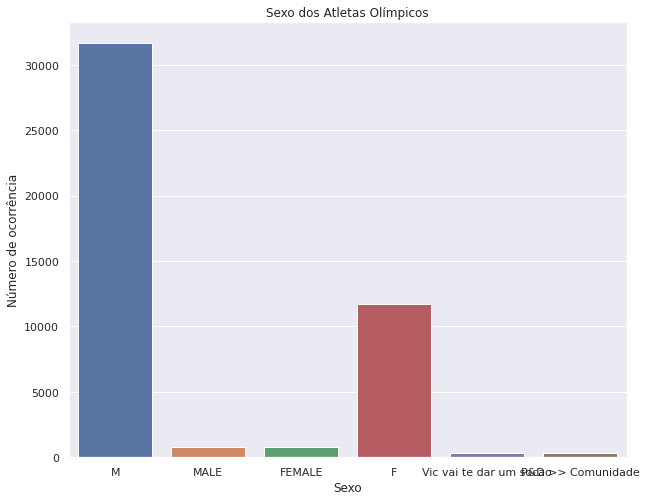

In [128]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Sex'])
sns.set_theme(style='darkgrid')
plt.title('Sexo dos Atletas Olímpicos')
plt.xlabel('Sexo')
plt.ylabel('Número de ocorrência')
plt.show()


O gráfico mostra que há valores que precisam ser retirados e outros que fornecem a mesma informação, mas escrita de outra forma.

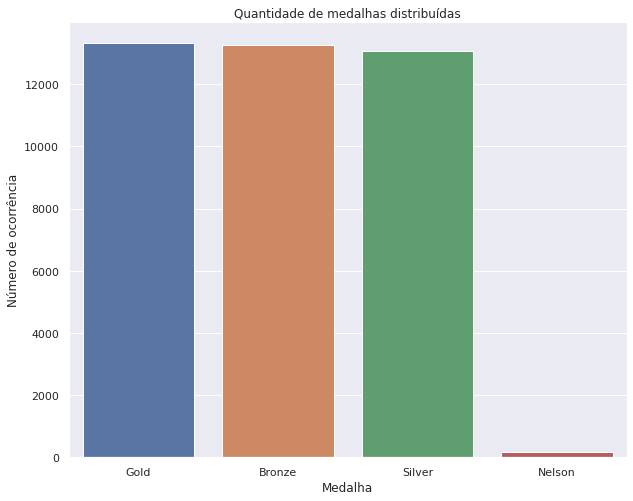

In [129]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Medal'])
sns.set_theme(style='darkgrid')
plt.title('Quantidade de medalhas distribuídas')
plt.xlabel('Medalha')
plt.ylabel('Número de ocorrência')
plt.show()

Como não existe a medalha Nelson, terei que tirá-la do dataset.

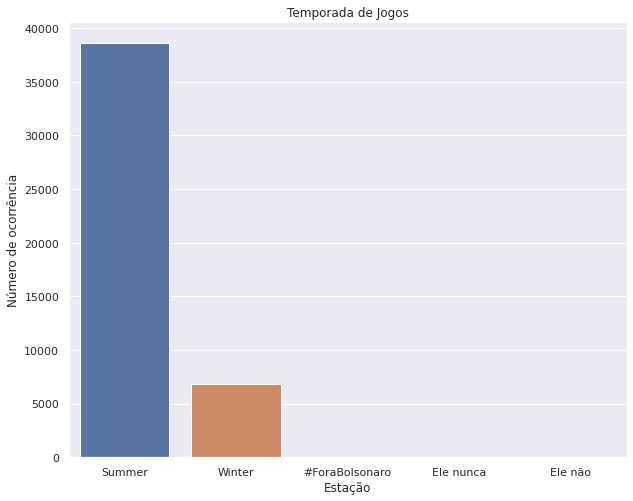

In [130]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Season'])
sns.set_theme(style='darkgrid')
plt.title('Temporada de Jogos')
plt.xlabel('Estação')
plt.ylabel('Número de ocorrência')
plt.show()

Novamente, há dados que necessitam ser retirados.

#### Trocando dados categóricos

#####Coluna de Sexo

In [131]:
df["Sex"].replace("M", "MALE", inplace=True) # inplace atribui ao dataframe
df["Sex"].replace("F", "FEMALE", inplace=True)

In [132]:
pd.Series(df.Sex.unique())

0                       MALE
1                     FEMALE
2    Vic vai te dar um socao
3          P&D >> Comunidade
dtype: object

In [133]:
len(df[df['Sex'] == 'Vic vai te dar um socao'])

312

In [134]:
len(df[df['Sex'] == 'P&D >> Comunidade'])

333

In [135]:
df['Sex'].value_counts()

MALE                       32429
FEMALE                     12493
P&D >> Comunidade            333
Vic vai te dar um socao      312
Name: Sex, dtype: int64

In [136]:
df['Sex'].replace('Vic vai te dar um socao', df['Sex'].mode()[0], inplace=True)
df['Sex'].replace('P&D >> Comunidade', df['Sex'].mode()[0], inplace=True)
df['Sex'].value_counts()

MALE      33074
FEMALE    12493
Name: Sex, dtype: int64

#####Coluna de medalha

In [137]:
len(df[df['Medal'] == 'Nelson'])

166

In [138]:
df['Medal'].replace('Nelson', df['Medal'].mode()[0], inplace=True)
pd.Series(df.Medal.unique())

0      Gold
1       NaN
2    Bronze
3    Silver
dtype: object

#####Coluna de temporada

In [139]:
len(df[df['Season'] == '#ForaBolsonaro'])

72

In [140]:
len(df[df['Season'] == 'Ele nunca'])

30

In [141]:
len(df[df['Season'] == 'Ele não'])

50

In [142]:
df['Season'].value_counts()

Summer            38607
Winter             6808
#ForaBolsonaro       72
Ele não              50
Ele nunca            30
Name: Season, dtype: int64

In [143]:
df['Season'].replace('#ForaBolsonaro', df['Season'].mode()[0], inplace=True)
df['Season'].replace('Ele nunca', df['Season'].mode()[0], inplace=True)
df['Season'].replace('Ele não', df['Season'].mode()[0], inplace=True)
df['Season'].value_counts()

Summer    38759
Winter     6808
Name: Season, dtype: int64

#####Coluna de Cidades

In [144]:
len(df[df['City'] == '######'])
 

134

In [145]:
df['City'].replace('######', df['City'].mode()[0], inplace=True)
pd.Series(df.City.unique())

0                      Paris
1                Albertville
2                  Antwerpen
3                      Sochi
4                     London
5                   Helsinki
6                Lillehammer
7             Salt Lake City
8                     Torino
9                    Beijing
10                     Seoul
11                   Atlanta
12                      Oslo
13              Squaw Valley
14                 Stockholm
15                 Melbourne
16            Rio de Janeiro
17                    Sydney
18                    Athina
19                    Moskva
20               Los Angeles
21                 Barcelona
22                    Berlin
23                     Tokyo
24                      Roma
25                    Munich
26                  Chamonix
27                 St. Louis
28              Sankt Moritz
29                    Nagano
30                   Calgary
31                  Grenoble
32                  Montreal
33                 Vancouver
34            

##### **Coluna de Peso**

Aqui, substituirei um dado não correspondente ao peso e trocarei o dtype para um tipo numérico.

In [146]:
len(df[df['Weight'] == 'hsuahusahu'])

500

In [147]:
df['Weight'].value_counts()

70.0     1443
75.0     1350
68.0     1087
60.0     1063
80.0     1052
         ... 
133.0       1
100.5       1
108.5       1
84.5        1
104.5       1
Name: Weight, Length: 188, dtype: int64

In [148]:
df['Weight'].replace('hsuahusahu', df['Weight'].mode()[0], inplace=True)

In [149]:
df['Weight'].mode()

0    70.0
dtype: object

In [150]:
df['Weight'].value_counts()

70.0                1943
75.0                1350
68.0                1087
60.0                1063
80.0                1052
                    ... 
31.0                   1
133.0                  1
175.0                  1
104.5                  1
77.3333333333333       1
Name: Weight, Length: 187, dtype: int64

In [151]:
df['Weight'] = pd.to_numeric(df['Weight'])
df.Weight

Athlete_ID
4          NaN
6         75.0
15         NaN
15         NaN
16        85.0
          ... 
135553    80.0
135553    80.0
135554    82.0
135563    64.0
135563    64.0
Name: Weight, Length: 45567, dtype: float64

In [152]:
df["Weight"].unique()

array([         nan,  75.        ,  85.        ,  64.        ,
        72.        ,  90.        ,  87.        ,  49.        ,
        70.        ,  76.        ,  83.        ,  86.        ,
        82.        ,  55.        ,  67.        ,  60.        ,
        79.        ,  96.        ,  97.        ,  88.        ,
        56.        ,  80.        ,  59.        ,  91.        ,
        62.        ,  63.        , 130.        , 104.        ,
        73.        ,  84.        , 125.        ,  50.        ,
       102.        ,  48.        ,  58.        ,  78.        ,
        40.        ,  68.        ,  92.        ,  61.        ,
        95.        ,  89.        ,  65.        ,  93.        ,
        77.        ,  46.        ,  81.        ,  52.        ,
        54.        ,  57.        ,  69.        ,  99.        ,
        69.5       ,  51.        , 120.        ,  74.        ,
       110.        , 100.        ,  66.        ,  47.        ,
       116.        , 107.        ,  53.        ,  45.  

###**Dados faltantes**

Por último, vamos verificar valores não preenchidos no dataset.

In [153]:
df.isnull().sum()

Name          0
Sex           0
Age         973
Height    10020
Weight    10641
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal      5763
dtype: int64

Como os dados referentes aos atletas que não ganharam medalhas não nos interessa, excluirei esses valores.

In [154]:
shape_antes = df.shape
print("Antes:\t", shape_antes)

df.dropna(subset=['Medal'], inplace=True)

shape_depois = df.shape
print("Depois:\t", shape_depois)

Antes:	 (45567, 14)
Depois:	 (39804, 14)


Ainda faltam alguns valores nulos em peso e altura mas esses irei apenas preencher com a média, afinal, tem informações relevantes que não poderão ser excluídas. 

In [155]:
df['Weight'].fillna(df['Weight'].mode()[0], inplace=True)


In [156]:
df['Height'].fillna(df['Height'].mode()[0], inplace=True)


In [157]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

Tudo limpo (espero)

### **Dados numéricos**

In [180]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,39753.0,25.872186,5.873926,10.0,22.0,25.0,29.0,73.0
Height,39753.0,178.086082,9.679591,136.0,172.0,180.0,183.0,223.0
Weight,39753.0,72.951496,13.158073,28.0,66.5,70.0,79.0,182.0
Year,39753.0,1973.939627,33.827805,1896.0,1952.0,1984.0,2002.0,2016.0


Analisando essa tabela, percebi que há outliers na coluna de Ano e Altura.

#### Tratando os outliers

#####Coluna = Year

In [159]:
df = df.astype({"Year": int}) # tirar o valor decimal

In [160]:
df = df[df["Year"] > 1800] 
df = df[df["Height"] < 2021]



#####Coluna = Height


In [231]:
df = df[df["Height"] > 0]
df = df[df["Height"] < 2500]

Vamos verificar se está tudo certo.

In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,39753.0,25.872186,5.873926,10.0,22.0,25.0,29.0,73.0
Height,39753.0,178.086082,9.679591,136.0,172.0,180.0,183.0,223.0
Weight,39753.0,72.951496,13.158073,28.0,66.5,70.0,79.0,182.0
Year,39753.0,1973.939627,33.827805,1896.0,1952.0,1984.0,2002.0,2016.0


## **Análise dos dados**

Agora que a limpeza dos dados já foi realizada, começarei a analisar possíveis padrões e/ou algumas informações interessantes entre os atletas que já ganharam medalhas.

In [163]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,MALE,34.0,180.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
15,Arvo Ossian Aaltonen,MALE,30.0,180.0,70.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,MALE,30.0,180.0,70.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,MALE,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
17,Paavo Johannes Aaltonen,MALE,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [164]:
df.describe(include=['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,39753,39753,39753,39753,39753,39753,39753,39753,39753,39753
unique,28192,2,499,149,51,2,42,66,756,3
top,"Michael Fred Phelps, II",MALE,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,28787,5208,5635,2044,34081,3730,3968,1269,13467


In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,39753.0,25.872186,5.873926,10.0,22.0,25.0,29.0,73.0
Height,39753.0,178.086082,9.679591,136.0,172.0,180.0,183.0,223.0
Weight,39753.0,72.951496,13.158073,28.0,66.5,70.0,79.0,182.0
Year,39753.0,1973.939627,33.827805,1896.0,1952.0,1984.0,2002.0,2016.0


### Sexo dos atletas

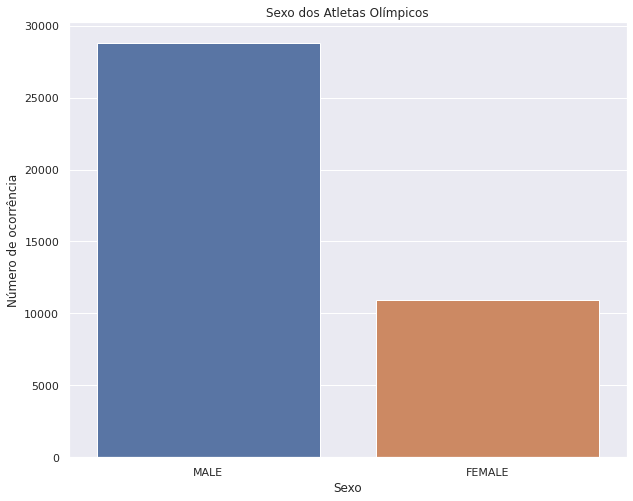

In [166]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Sex'])
sns.set_theme(style='darkgrid')
plt.title('Sexo dos Atletas Olímpicos')
plt.xlabel('Sexo')
plt.ylabel('Número de ocorrência')
plt.show()

No gráfico, verifica-se que, entre os que ganharam medalhas, os homens configuram-se como maioria. 

###Mulheres nas olimpíadas

Text(0.5, 1.0, 'Participação Feminina nas Olimpíadas')

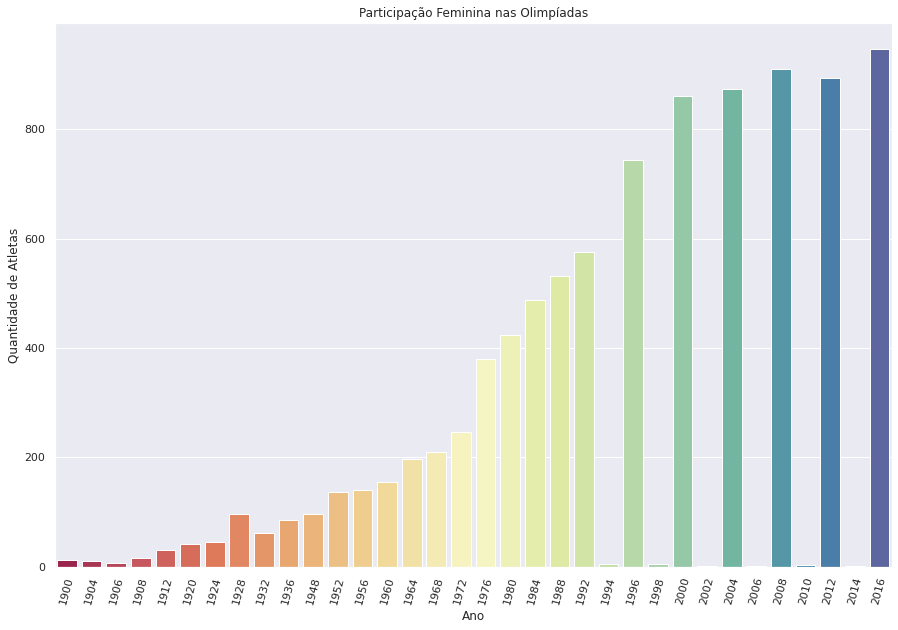

In [186]:
mulheres = df[(df.Sex=='FEMALE')&(df.Season=='Summer')]

sns.set(style='darkgrid')
plt.figure(figsize=(15,10))
plt.xticks(rotation=75)
sns.countplot(x='Year',data=mulheres, palette='Spectral')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Atletas')
plt.title('Participação Feminina nas Olimpíadas')

Aqui, percebemos que, com o passar das olimpíadas, cresceu a participação feminina no evento.

###Média de idade, por sexo, em cada medalha.

In [232]:
df.groupby(['Sex','Medal']).agg({'Age': np.mean})

Age
Sex    Medal            
FEMALE Bronze  24.637969
       Gold    24.193077
       Silver  24.403670
MALE   Bronze  26.075147
       Gold    26.263638
       Silver  26.360253

###Pessoa que mais ganhou medalhas

Como já sei que foi o Michael Fred Phelps porque está na tabela com os dados categóricos, só irei ver mais de perto a quantidade.

In [169]:
df_topmedalha = df[df["Name"] == "Michael Fred Phelps, II"]
df_topmedalha

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
94406,"Michael Fred Phelps, II",MALE,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze
94406,"Michael Fred Phelps, II",MALE,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
94406,"Michael Fred Phelps, II",MALE,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
94406,"Michael Fred Phelps, II",MALE,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,Gold
94406,"Michael Fred Phelps, II",MALE,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Butterfly,Gold
94406,"Michael Fred Phelps, II",MALE,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Individual Medley,Gold
94406,"Michael Fred Phelps, II",MALE,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 400 metres Individual Medley,Gold
94406,"Michael Fred Phelps, II",MALE,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
94406,"Michael Fred Phelps, II",MALE,23.0,193.0,91.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 200 metres Freestyle,Gold


Michael Fred Phelps foi a pessoa que mais ganhou medalhas na história das olimpíadas, totalizando 28.

###Pessoa mais alta e baixa a participar das olimpíada

In [170]:
max_valor = df["Height"].max()
df[df["Height"] == max_valor]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
16639,Tommy Loren Burleson,MALE,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver
104059,Arvydas Romas Sabonis,MALE,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
104059,Arvydas Romas Sabonis,MALE,27.0,223.0,122.0,Lithuania,LTU,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze
104059,Arvydas Romas Sabonis,MALE,31.0,223.0,122.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


No caso, duas pessoas, com a mesma altura, foram as mais altas a participarem das olimpíadas: **Tommy Loren Burleson** e **Arvydas Romas Sabonis**, ambos do basquete.

In [171]:
min_valor = df["Height"].min()
df[df["Height"] == min_valor]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
35292,Mariya Yevgenyevna Filatova (-Kurbatova),FEMALE,14.0,136.0,30.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
35292,Mariya Yevgenyevna Filatova (-Kurbatova),FEMALE,19.0,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
35292,Mariya Yevgenyevna Filatova (-Kurbatova),FEMALE,19.0,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
71914,Lu Li,FEMALE,15.0,136.0,30.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Uneven Bars,Gold
71914,Lu Li,FEMALE,15.0,136.0,70.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Balance Beam,Silver


Entre os mais baixos, duas atletas levam esse posto: **Mariya Yevgenyevna Filatova** e **Mariya Yevgenyevna Filatova**, ambas da ginástica

###Medalhas por idade

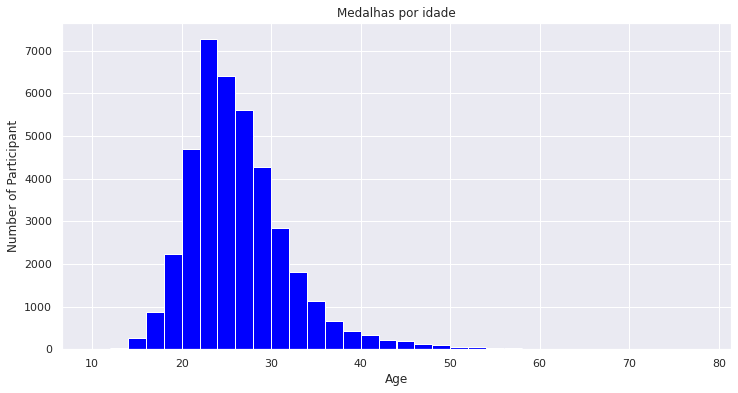

In [174]:
plt.figure(figsize=(12, 6))
plt.title('Medalhas por idade')
plt.xlabel('Age')
plt.ylabel('Número de Participantes')

plt.hist(df.Age, bins=np.arange(10,80,2), color='blue');


O intervalo entre 20-30 anos é o que mais tem medalhas. 

###Pessoa mais nova e velha a ganhar uma medalha

Primeiro, o mais velho:

In [172]:
idade_idoso = df["Age"].max()
df[df["Age"] == idade_idoso]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
22984,John (Herbert Crawford-) Copley (Williamson-),MALE,73.0,180.0,70.0,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver


John Copley, com 73 anos, ganhou uma medalha, em uma modalidade que foi extinta. Fui pesquisar e vi que havia competição para arquitetos e artistas, e a última edição foi em 1948. 


Agora, o mais novo:

In [173]:
idade_crianca = df["Age"].min()
df[df["Age"] == idade_crianca]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
71691,Dimitrios Loundras,MALE,10.0,180.0,70.0,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


Dimitrios Loundras, com 10 anos, ganhou uma medalha... eu com 10 anos estava comendo terra.



###10 países que mais ganharam medalhas

In [175]:
paises_medalha = df.Team.value_counts().sort_values(ascending=False).head(10)
paises_medalha

United States    5208
Soviet Union     2448
Germany          1981
Great Britain    1670
France           1547
Italy            1525
Sweden           1427
Australia        1301
Canada           1240
Hungary          1127
Name: Team, dtype: int64

Vamos plotar um gráfico com esses dados para melhor visualização:

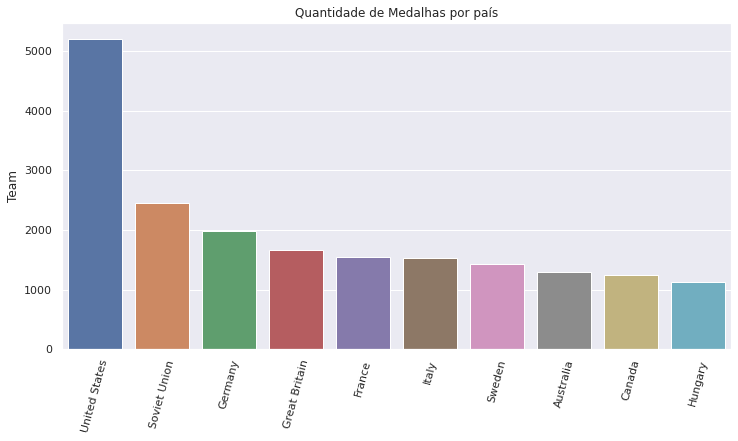

In [176]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Quantidade de Medalhas por país')
sns.barplot(x=paises_medalha.index, y=paises_medalha);

### Participações por temporada

In [177]:
temporada = df.Season.value_counts()
temporada

Summer    34081
Winter     5672
Name: Season, dtype: int64

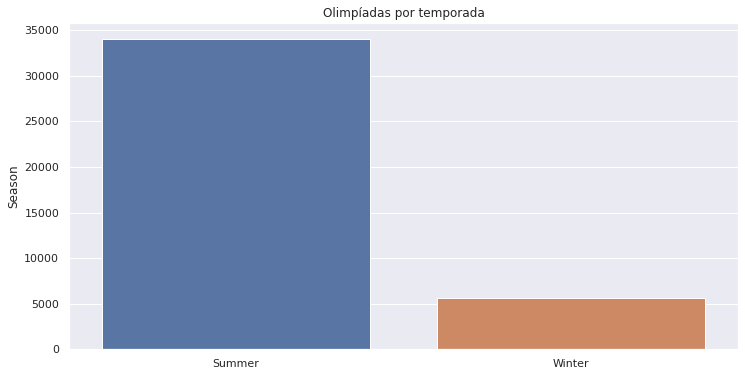

In [178]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title('Olimpíadas por temporada')
sns.barplot(x=temporada.index, y=temporada);

###Desempenho do Brasil nas Olimpíadas

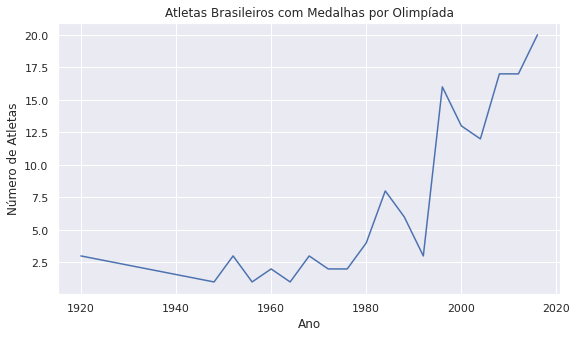

In [230]:
df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)
br2 = df[df['NOC'] == 'BRA']
medal_BR = br2.groupby('Year').count()['Medal'].reset_index()

x = medal_BR['Year']
y = medal_BR['Medal']

plt.plot(x,y)
plt.title('Atletas Brasileiros com Medalhas por Olimpíada')
plt.xlabel('Ano')
plt.ylabel('Número de Atletas')
plt.show()


## Conclusões

Após a análise dos dados, algumas conclusões sobre os medalhistas podem ser tiradas.
Por exemplo, a  maioria dos participantes são majoritariamente homens e, consequentemente, são os que mais ganharam medalhas. Mesmo assim, a participação feminina desde a primeira edição das olimpíadas, em 1896, aumenta a cada edição. Outro número que cresceu foi o ganho de medalhas pela delegação olímpica brasileira, porém, muito inferior aos Estados Unidos, que lidera com folga. Inclusive, o atleta que mais ganhou medalhas na história das olimpíadas foi o Michael Phelps, estadunidense, com 28 medalhas. Além disso, um padrão observado foi que a média de idade entre pessoas que ganharam medalhas gira em torno de 26 anos para homens e 24 anos para mulheres, portanto, se você é mais novo, ainda dá tempo de garantir a sua e entrar para as estatísticas! Já você que passou dessa idade, a esperança não acabou: a pessoa mais velha a ganhar uma medalha tinha 73 anos, ou seja, nada é impossível.
